# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`При запуске кода за счет фиксированного сида мы всегда будем получать один и тот же результат.`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
# Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [4]:
# Отобразите первые 5 объектов тестового датасета
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [5]:
# Отобразите последние 5 объектов тестового датасета
df_test.tail()

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [6]:
# Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения.
# Объединяем df_train и df_test
df_combined = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
missing_columns = df_combined.isna().sum()
missing_columns = missing_columns[missing_columns > 0]
if not missing_columns.empty:
    print(missing_columns)

mileage      221
engine       221
max_power    215
torque       222
seats        221
dtype: int64


In [7]:
# Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
duplicates_count = df_combined.duplicated().sum()
print(f'Кол-во дубликатов: {duplicates_count}')

Кол-во дубликатов: 1170


In [ ]:
!pip install ydata-profiling

In [9]:
# Постройте дашборд, используя ydata-profilling(0.15 балла)
from ydata_profiling import ProfileReport

profile = ProfileReport(df_combined, title="Отчет по датасету", explorative=True)
profile.to_notebook_iframe()
profile.to_file("dataset_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [10]:
# Только числовые столбцы, тк берем медианы
num_col = df_train.select_dtypes(include=['number']).columns
medians = df_train[num_col].median()

df_train[num_col] = df_train[num_col].fillna(medians)
df_test[num_col] = df_test[num_col].fillna(medians)

print("Кол-во пропусков в df_train:")
print(df_train[num_col].isna().sum().sum())

print("Кол-во пропусков в df_test:")
print(df_test[num_col].isna().sum().sum())

Кол-во пропусков в df_train:
0
Кол-во пропусков в df_test:
0


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [11]:
# Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
df_wo_target = df_train.drop(columns=['selling_price']) # Искл целевую переменную selling_price
duplicate_count = df_wo_target.duplicated(keep=False).sum()
print(f"Количество объектов с одинаковым признаковым описанием (без selling_price): {duplicate_count}")

Количество объектов с одинаковым признаковым описанием (без selling_price): 1799


In [12]:
# Отобразите такие объекты (0.15 балла)
dup_term = df_wo_target.duplicated(keep=False)
df_wo_target[dup_term]

name  year  km_driven    fuel  \
22                     Maruti Baleno Delta 1.2  2016      45000  Petrol   
26                 Maruti Omni E MPI STD BS IV  2018      25000  Petrol   
27             Maruti Vitara Brezza LDi Option  2017      70000  Diesel   
28                          Fiat Palio 1.2 ELX  2003      50000  Petrol   
29                   Maruti Omni 8 Seater BSIV  2012      35000  Petrol   
...                                        ...   ...        ...     ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner     mileage   engine  max_power  \
22    Individual       Manual   First Owner   21.4 kmpl  1197 CC   83.1 bhp   
26    Individual       Manual   First Owner   16.8 kmpl   796 CC   34.2 bhp   
27    Individual       Manual   First Owner   24.3 kmpl  1248 CC   88.5 bhp   
28    Individual       Manual  Second Owner         NaN      NaN        NaN   
29    Individual       Manual  Second Owner   14.0 kmpl   796 CC     35 bhp   
...          ...          ...           ...         ...      ...        ...   
6981  Individual       Manual   First Owner   24.4 kmpl  1498 CC  98.63 bhp   
6984  Individual       Manual   First Owner   24.4 kmpl  1498 CC  98.63 bhp   
6989  Individual       Manual   First Owner  26.59 kmpl  1248 CC     74 bhp   
6997  Individual       Manual   First Owner  23.57 kmpl  1396 CC     70 bhp   
6998  Individual       Manual   First Owner  23.57 kmpl  1396 CC     70 bhp   

                   torque  seats  
22         115Nm@ 4000rpm    5.0  
26          59Nm@ 2500rpm    8.0  
27         200Nm@ 1750rpm    5.0  
28                    NaN    5.0  
29        6.1kgm@ 3000rpm    5.0  
...                   ...    ...  
6981  215Nm@ 1750-3000rpm    5.0  
6984  215Nm@ 1750-3000rpm    5.0  
6989       190Nm@ 2000rpm    5.0  
6997  140Nm@ 1800-3000rpm    5.0  
6998  140Nm@ 1800-3000rpm    5.0  

[1799 rows x 12 columns]

In [13]:
# Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
df_train = df_train[~df_wo_target.duplicated(keep='first')]
print(f"Количество строк после удаления дубликатов: {df_train.shape[0]}")

Количество строк после удаления дубликатов: 5840


In [14]:
# Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)
df_train = df_train.reset_index(drop=True)
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [15]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [16]:
# Уберите единицы измерения для признаков mileage, engine, max_power.
# Приведите тип данных к float.
import numpy as np

def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return np.nan

df_train['mileage'] = df_train['mileage'].astype(str).str.split().str[0].apply(convert_to_float)
df_train['engine'] = df_train['engine'].astype(str).str.split().str[0].apply(convert_to_float)
df_train['max_power'] = df_train['max_power'].astype(str).str.split().str[0].apply(convert_to_float)

df_test['mileage'] = df_test['mileage'].astype(str).str.split().str[0].apply(convert_to_float)
df_test['engine'] = df_test['engine'].astype(str).str.split().str[0].apply(convert_to_float)
df_test['max_power'] = df_test['max_power'].astype(str).str.split().str[0].apply(convert_to_float)

print(df_train[['mileage', 'engine', 'max_power']].sample(5))
print(df_test[['mileage', 'engine', 'max_power']].sample(5))

      mileage  engine  max_power
635     15.10  2179.0     140.00
3423    17.01  1591.0     121.30
4744    17.00  1497.0     121.31
2195    24.30  1248.0      88.50
4353    22.32  1582.0     126.30
     mileage  engine  max_power
738    21.66  1498.0     108.62
339    18.80  1248.0      90.00
791    18.90   998.0      67.10
507    21.10   814.0      55.20
197    12.80  2494.0     102.00


In [17]:
# Удалите столбец torque
df_train = df_train.drop('torque', axis = 1)
df_test = df_test.drop('torque', axis = 1)

In [18]:
# Заполняем пустые значения медианами
num_col = df_train.select_dtypes(include=['number']).columns
medians = df_train[num_col].median()

df_train[num_col] = df_train[num_col].fillna(medians)
df_test[num_col] = df_test[num_col].fillna(medians)

print("Кол-во пропусков в df_train:")
print(df_train[num_col].isna().sum().sum())

print("Кол-во пропусков в df_test:")
print(df_test[num_col].isna().sum().sum())

Кол-во пропусков в df_train:
0
Кол-во пропусков в df_test:
0


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [19]:
# Осуществите приведение столбцов к необходимому типу.
df_train['engine'] = df_train['engine'].fillna(0).astype(int)
df_train['seats'] = df_train['seats'].fillna(0).astype(int)

df_test['engine'] = df_test['engine'].fillna(0).astype(int)
df_test['seats'] = df_test['seats'].fillna(0).astype(int)

In [20]:
print(df_train[['engine', 'seats']].dtypes)
print('-' * 10)
print(df_test[['engine', 'seats']].dtypes)

engine    int64
seats     int64
dtype: object
----------
engine    int64
seats     int64
dtype: object


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [21]:
# Посчитайте основные статистики по числовым столбцам для трейна и теста
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [22]:
df_test.describe()

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.841670     5.403000  
std      34.893389     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [23]:
# Посчитайте основные статистики по категориальным столбцам для трейна и теста
df_train.select_dtypes(include=['object']).describe()

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [24]:
df_test.select_dtypes(include=['object']).describe()

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [25]:
# Кол-во столбцов сократилось до 12, после удаления столбца 'torque'. Поэтому assert не пройдет.
# assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

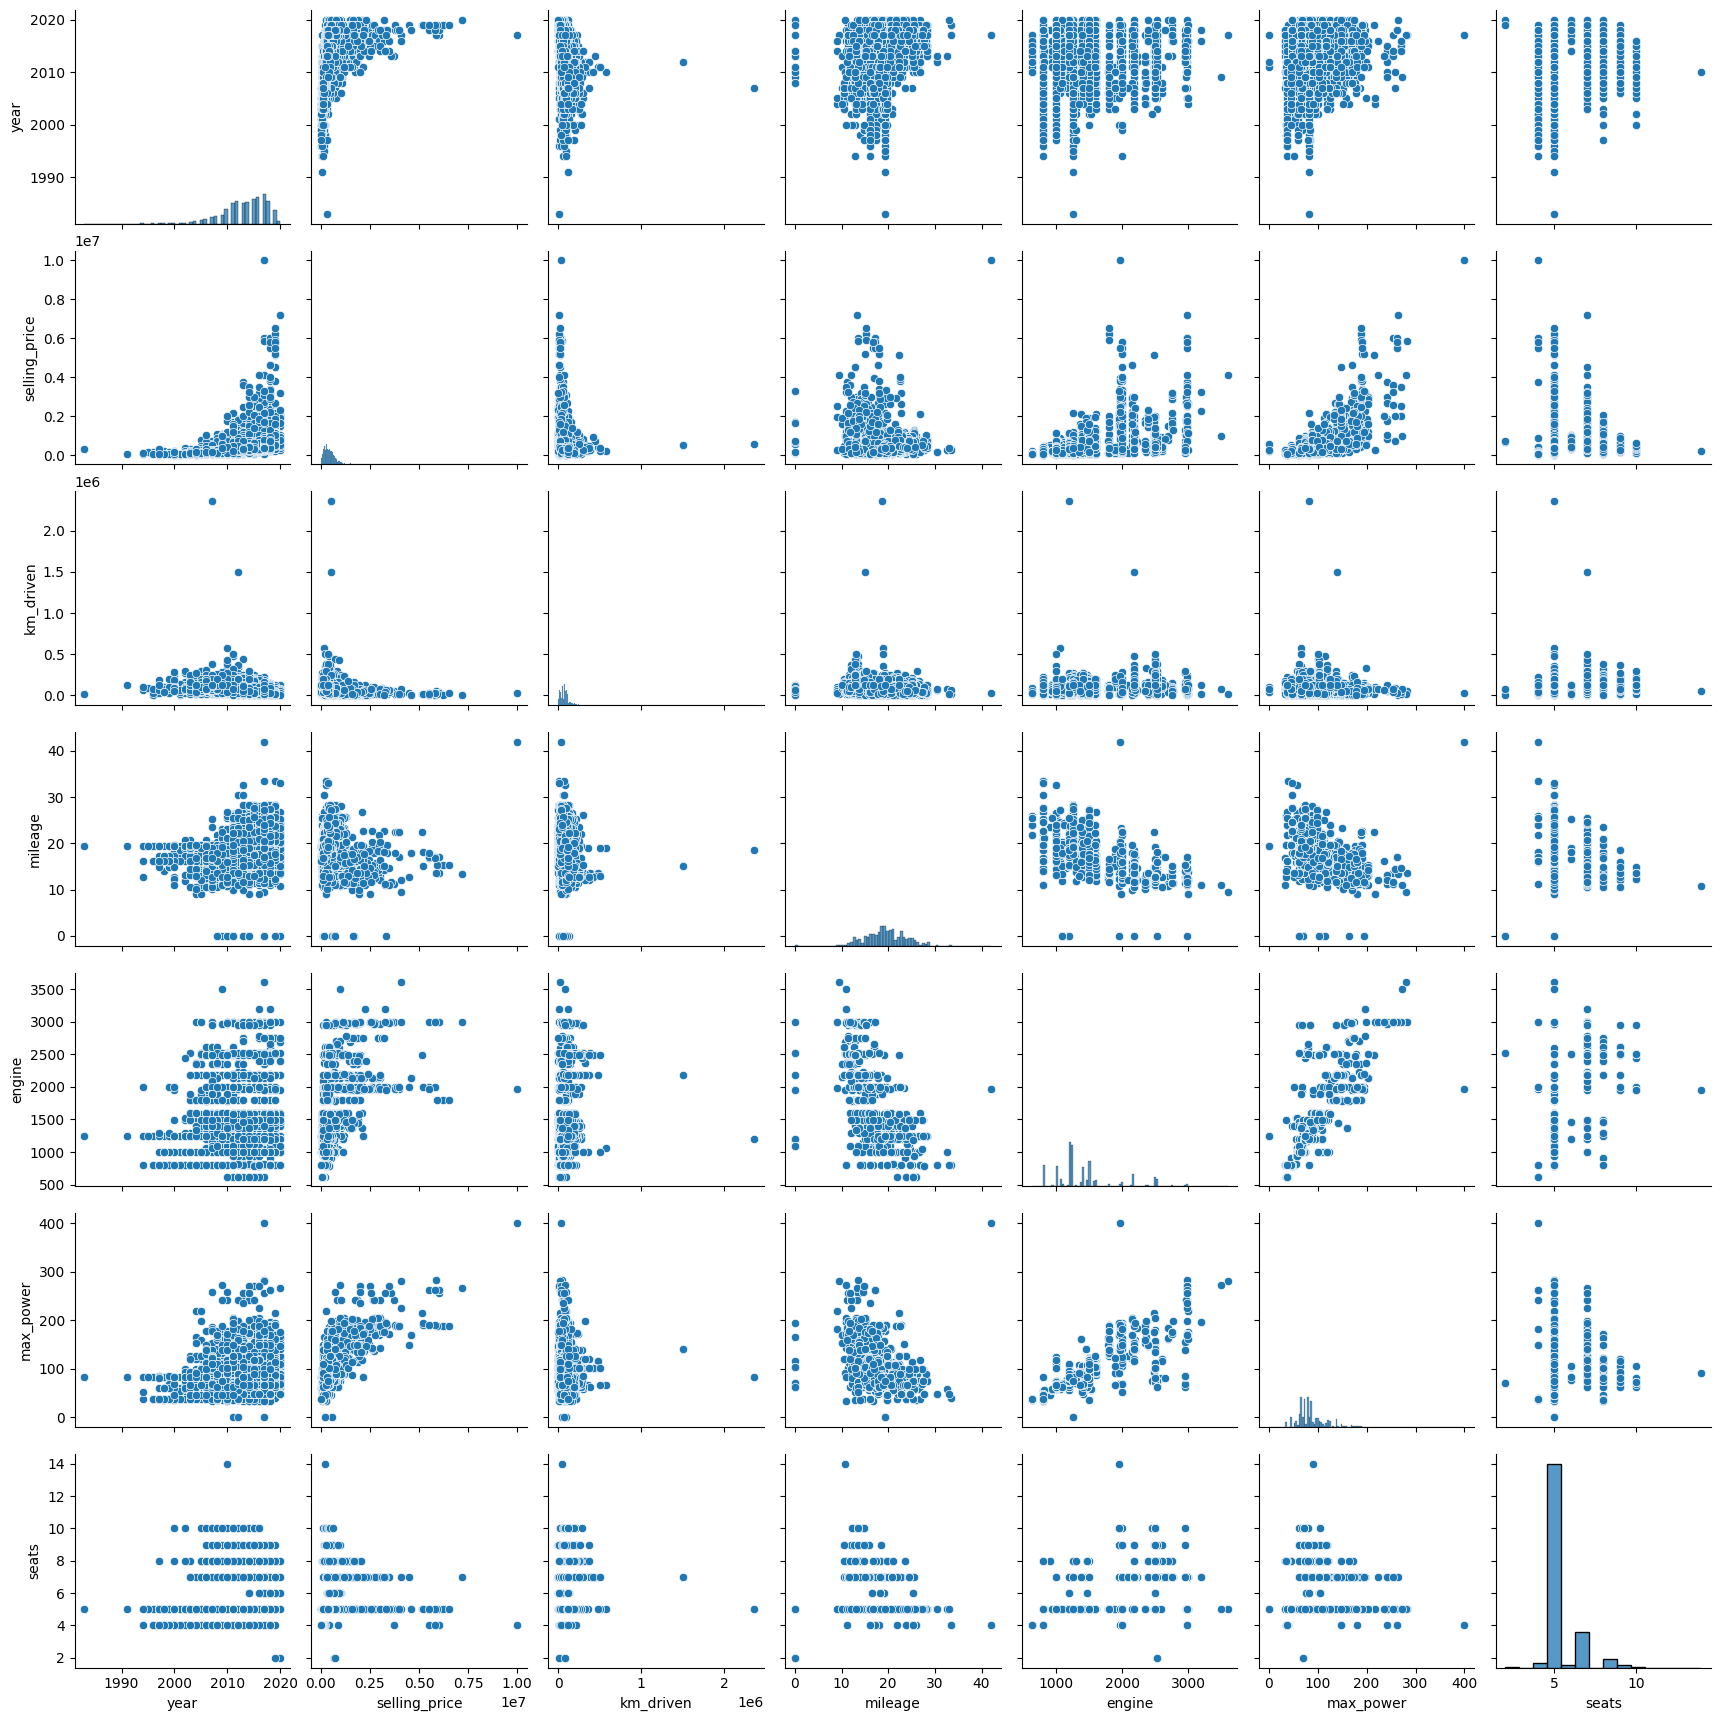

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

df_num_train = df_train.select_dtypes(include=['number'])

sns.pairplot(df_num_train)
plt.show()

**Можно ли предположить на основе распределений связь признаков с целевой переменной?**

Да, можно.

1. year и selling_price: Cтоимость автомобилей имеет тенденцию увеличиваться для более новых моделей (значения year ближе к 2020).

2. km_driven и selling_price: Автомобили с большим пробегом имеют более низкую стоимость.

3. mileage и selling_price: Автомобили с низким расходом топлива (высоким mileage) могут иметь меньшую стоимость.

4. engine и selling_price: Автомобили с большим объемом двигателя (engine) имеют тенденцию к более высокой стоимости.

5. max_power и selling_price: Модели с большей максимальной мощностью (max_power)  имеют более высокую стоимость.

**Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?**

Да, можно.

1. engine и max_power: Более мощные двигатели имеют больший объем.

2. engine и seats: Кол-во мест в машине зависит от объема двигателя.

3. engine и mileage: Расход топлива машины зависит от объема двигателя.

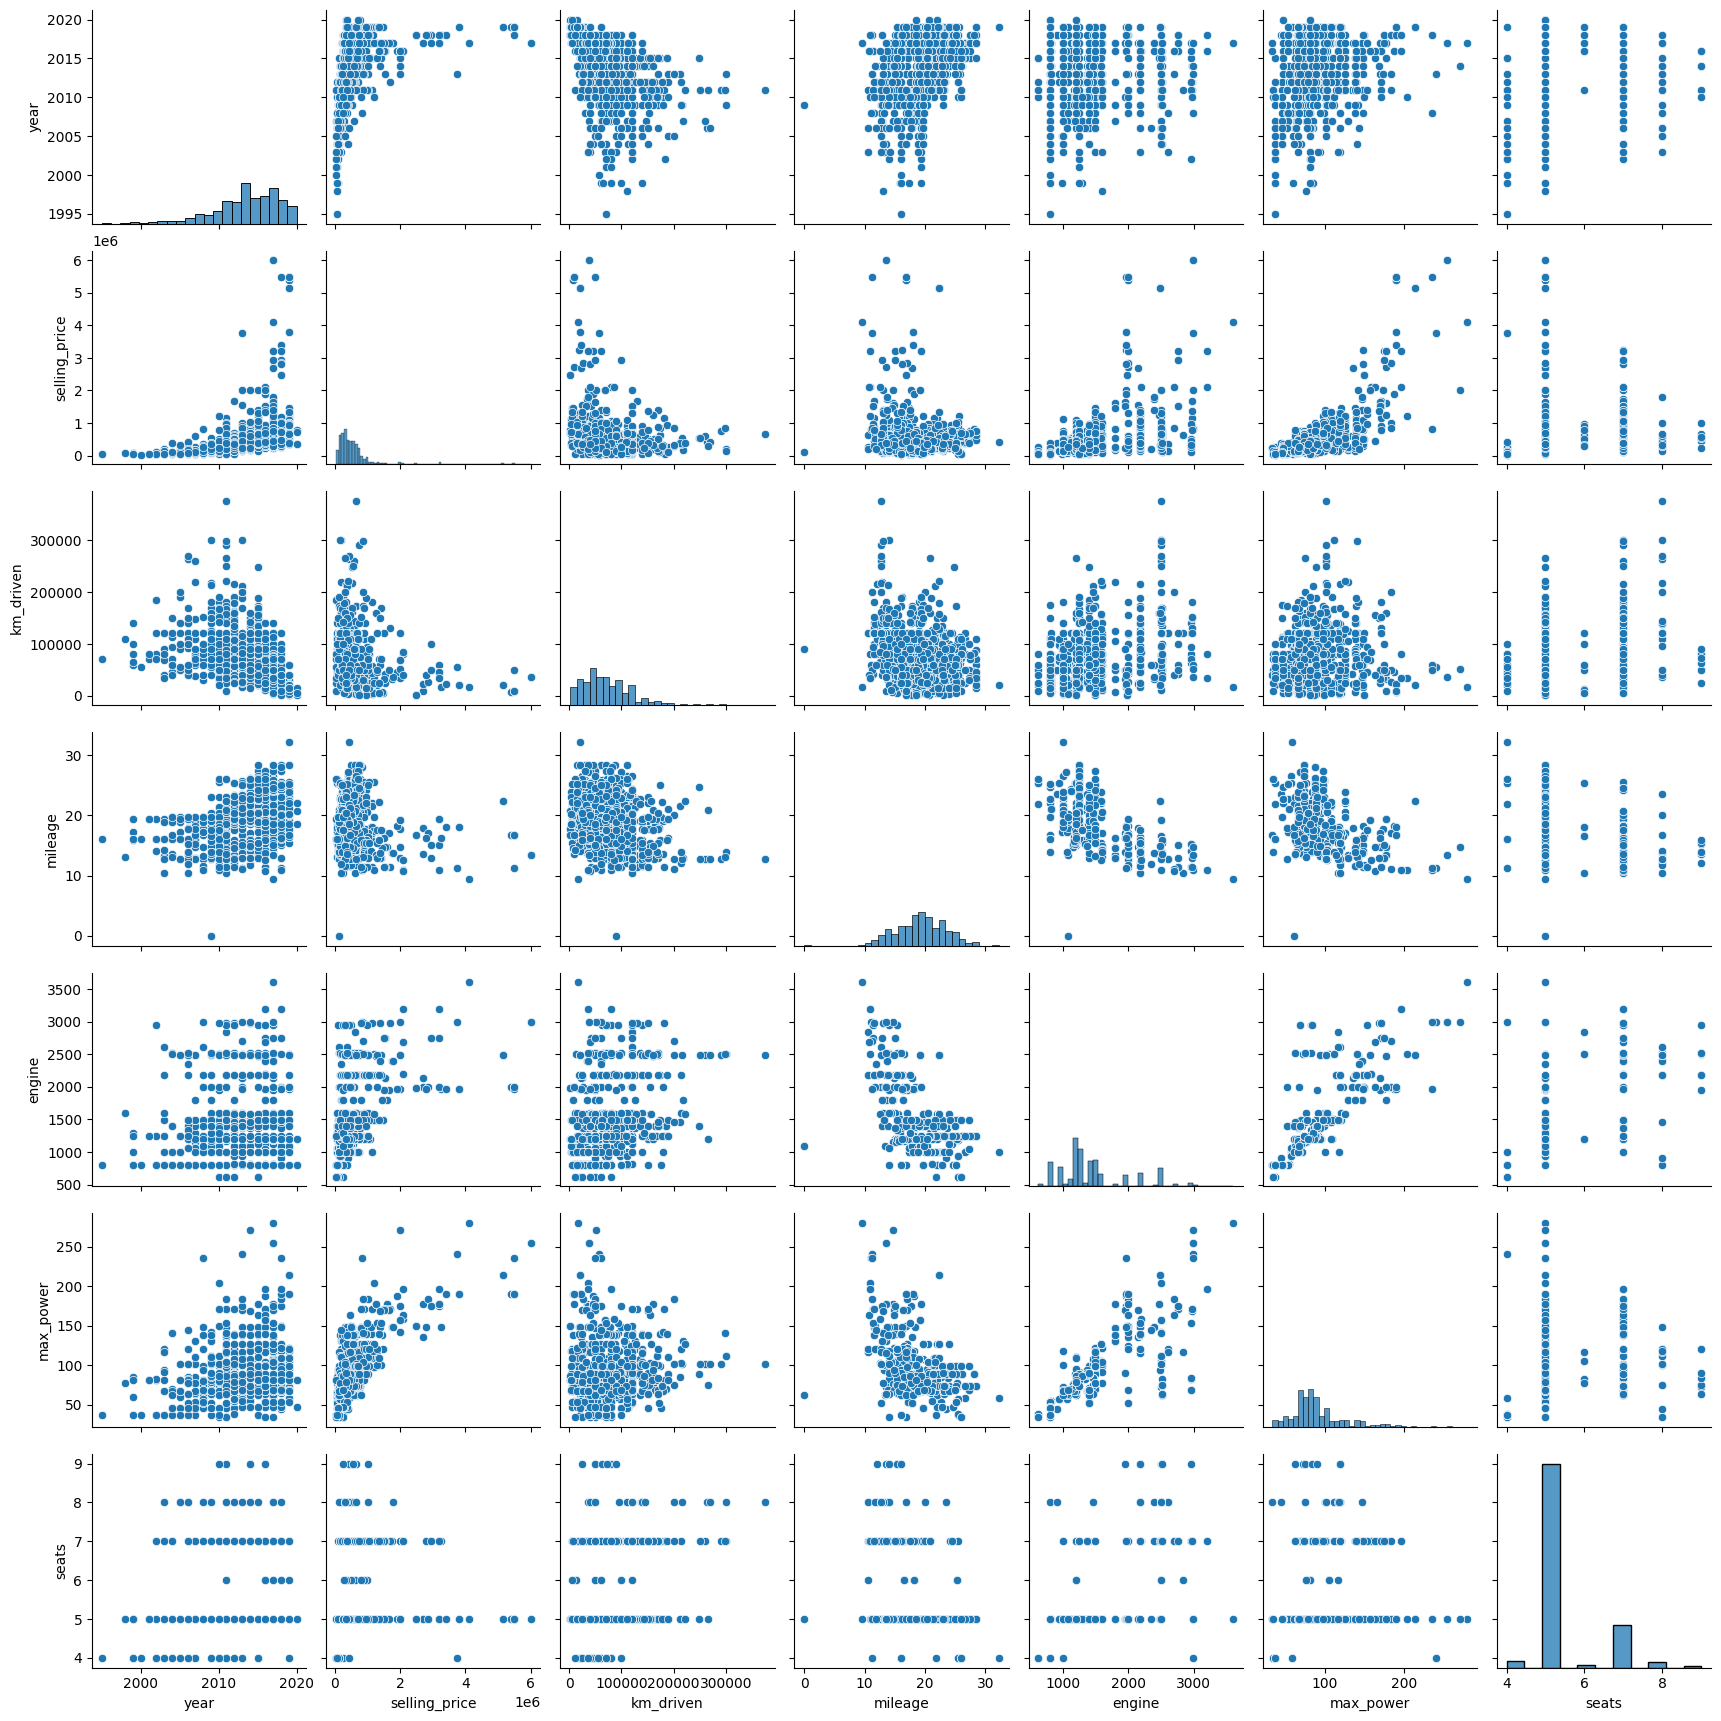

In [27]:
df_num_test = df_test.select_dtypes(include=['number'])

sns.pairplot(df_num_test)
plt.show()

**Похожими ли оказались совокупности при разделении на трейн и тест?**

Да, похожими.
Единственное - признак km_driven по отношению к тагрету показывает, что распределение между значениям в основном не только в границах 100 тыс.км., но и значительная часть - более 200 тыс.км. и даже 300 тыс.км.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [28]:
df_num_train = df_train.select_dtypes(include=['number'])
correlation_matrix = df_num_train.corr(method='pearson')
correlation_matrix

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage        0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine         0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power      0.156858       0.692814   0.024588 -0.373390  0.681117   
seats          0.041178       0.149953   0.192328 -0.451059  0.652172   

               max_power     seats  
year            0.156858  0.041178  
selling_price   0.692814  0.149953  
km_driven       0.024588  0.192328  
mileage        -0.373390 -0.451059  
engine          0.681117  0.652172  
max_power       1.000000  0.244112  
seats           0.244112  1.000000

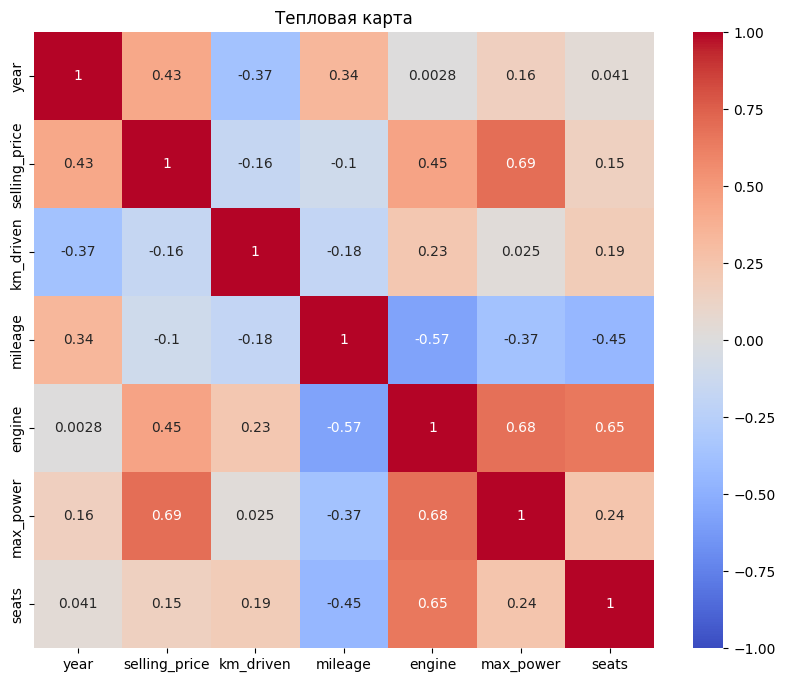

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Тепловая карта")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1) Какие 2 признака наименее скоррелированы между собой?

max_power и km_driven

2) Между какими наблюдается довольно сильная положительная линейная зависимость?

Помимо самой сильной корреляции между признаком max_power и таргетом selling_price: 0.7, есть признаки между которыми есть сильная положительная линейная зависимость:
*   max_power и engine (0.68)
*   seats и engine (0.61)

3) Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Правильно так кая линейная зависимость есть между признаками km_driven и year, и она ОТРИЦАТЕЛЬНАЯ. А это значит что чем больше год, тем меньше пробег и соответственно наоборот.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

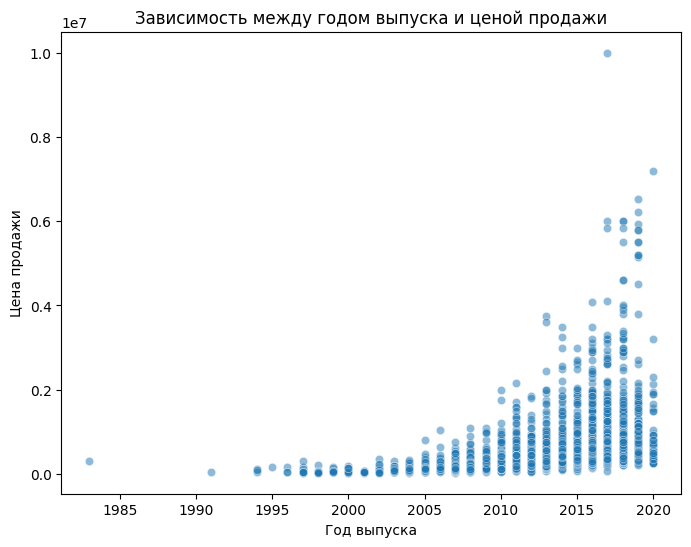

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='year', y='selling_price', alpha=0.5)
plt.title("Зависимость между годом выпуска и ценой продажи")
plt.xlabel("Год выпуска")
plt.ylabel("Цена продажи")
plt.show()

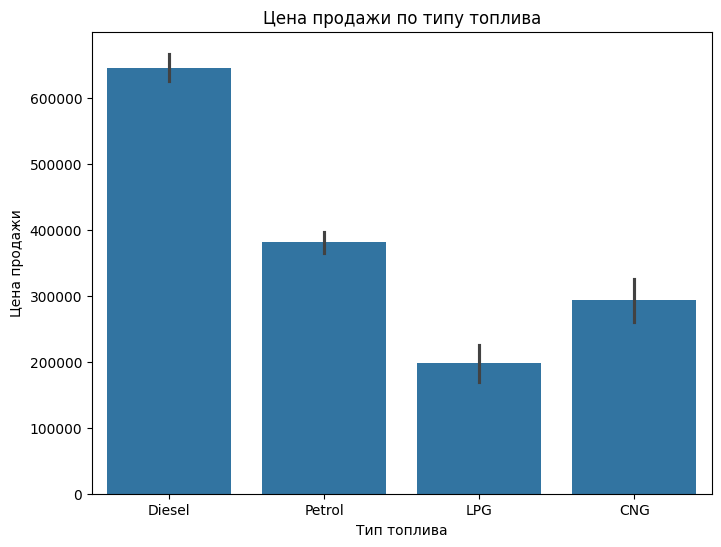

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_train, x='fuel', y='selling_price')
plt.title("Цена продажи по типу топлива")
plt.xlabel("Тип топлива")
plt.ylabel("Цена продажи")
plt.show()

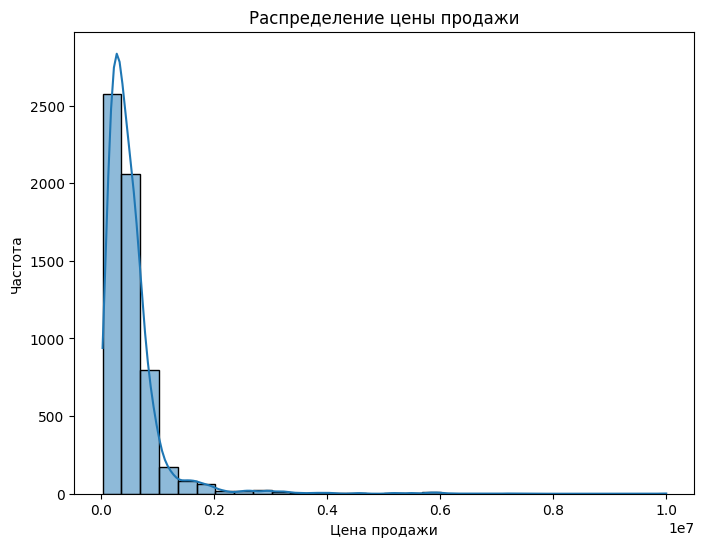

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(df_train['selling_price'], bins=30, kde=True)
plt.title("Распределение цены продажи")
plt.xlabel("Цена продажи")
plt.ylabel("Частота")
plt.show()

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [33]:
df_num_train = df_train.select_dtypes(include='number')
y_train = df_num_train['selling_price']
X_train = df_num_train.drop('selling_price', axis=1)

In [34]:
assert X_train.shape == (5840, 6)

In [35]:
df_num_test = df_test.select_dtypes(include='number')
y_test = df_num_test['selling_price']
X_test = df_num_test.drop('selling_price', axis=1)

In [36]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [38]:
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'R2 для train: {r2_train:.5f}')
print(f'MSE для train: {mse_train:.5f}')
print(f'R2 для test: {r2_test:.5f}')
print(f'MSE для test: {mse_test:.5f}')

R2 для train: 0.59226
MSE для train: 116874153930.02855
R2 для test: 0.59414
MSE для test: 233298779730.45486


Модель показывает умеренную предсказательную способность (около 0.59) на обеих выборках, это говорит о её стабильности и отсутствии переобучения. Но высокие значения MSE говорят о значительных отклонениях предсказаний от реальных значений.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [39]:
from sklearn.preprocessing import StandardScaler

scaler_train = StandardScaler()

X_train_scaled = scaler_train.fit_transform(X_train)
X_test_scaled = scaler_train.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = model_scaled.predict(X_train_scaled)
y_test_pred_scaled = model_scaled.predict(X_test_scaled)

r2_train_scaled = r2_score(y_train, y_train_pred_scaled)
mse_train_scaled = MSE(y_train, y_train_pred_scaled)

r2_test_scaled = r2_score(y_test, y_test_pred_scaled)
mse_test_scaled = MSE(y_test, y_test_pred_scaled)

print(f'R2 для train (после стандартизации): {r2_train_scaled:.5f}')
print(f'MSE для train (после стандартизации): {mse_train_scaled:.5f}')
print(f'R2 для test (после стандартизации): {r2_test_scaled:.5f}')
print(f'MSE для test (после стандартизации): {mse_test_scaled:.5f}')

R2 для train (после стандартизации): 0.59226
MSE для train (после стандартизации): 116874153930.02892
R2 для test (после стандартизации): 0.59414
MSE для test (после стандартизации): 233298779730.44965


Стандартизация признаков не повлияла на качество модели. Значения R2 и MSE остались практически неизменными для обеих выборок.

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [40]:
all_coefficients = model_scaled.coef_
coef = pd.DataFrame({'признак': X_train.columns, 'коэф': all_coefficients})
coef['модуль по коэф'] = coef['коэф'].abs()

max_coef = coef.loc[coef['модуль по коэф'].idxmax()]

print(f"Наиболее информативный признак: {max_coef['признак']} (коэффициент = {max_coef['коэф']:.5f})")

Наиболее информативный признак: max_power (коэффициент = 322807.35326)


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [41]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_train_lasso = MSE(y_train, y_train_pred_lasso)

r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print(f'R² для трейна (Lasso): {r2_train_lasso:.5f}')
print(f'MSE для трейна (Lasso): {mse_train_lasso:.5f}')
print(f'R² для теста (Lasso): {r2_test_lasso:.5f}')
print(f'MSE для теста (Lasso): {mse_test_lasso:.5f}')

R² для трейна (Lasso): 0.59226
MSE для трейна (Lasso): 116874153940.14290
R² для теста (Lasso): 0.59414
MSE для теста (Lasso): 233299450599.16928


Применение Lasso-регрессии также не привело к улучшению метрик модели. Значения R2 и MSE остались практически неизменными.

In [42]:
coef2 = pd.DataFrame({'признак': X_train.columns, 'коэф': lasso_model.coef_})
coef2['модуль по коэф'] = coef2['коэф'].abs()

zero_coef2 = coef2[coef2['коэф'] == 0]

print("Признаки с зануленными коэффициентами (Lasso):")
print(zero_coef2[['признак', 'коэф']])

Признаки с зануленными коэффициентами (Lasso):
Empty DataFrame
Columns: [признак, коэф]
Index: []


```
Lasso с параметрами (например, alpha=1) не занулила ни один из коэффициентов.
Возможно из-за слишком слабой регуляризации. Признаков в наборе данных не так много и возможно все они достаточно важны для предсказания целевой переменной.
```

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [43]:
from sklearn.model_selection import GridSearchCV

lasso2 = Lasso()
params = {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}

grid_search = GridSearchCV(estimator=lasso2, param_grid=params, cv=10, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print(f"Оптимальное alpha: {best_alpha}")
print(f"Лучшее значение R2: {best_score:.5f}")

Оптимальное alpha: 10000
Лучшее значение R2: 0.57272


**1) Сколько грид-сёрчу пришлось обучать моделей?**

8 значений alpha * 10 фолдов = 80 моделей


In [44]:
lasso_optimal = Lasso(alpha=best_alpha)
lasso_optimal.fit(X_train_scaled, y_train)

coef3 = pd.DataFrame({'признак': X_train.columns, 'коэф': lasso_optimal.coef_})
zeroed_coeffs = coef3[coef3['коэф'] == 0]

print("Признаки с зануленными коэффициентами при alpha=10000:")
print(zeroed_coeffs[['признак', 'коэф']])

Признаки с зануленными коэффициентами при alpha=10000:
  признак  коэф
5   seats  -0.0


**2) Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?**

Лучший коэффициент регуляризации = 10000.

Признаки с зануленными коэффициентами при alpha=10000:

- seats. С коэффициентом -0.0.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [45]:
from sklearn.linear_model import ElasticNet

params2 = {
    'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}

elastic_net = ElasticNet()

grid_search_elastic = GridSearchCV(estimator=elastic_net, param_grid=params2, cv=10, scoring='r2')
grid_search_elastic.fit(X_train_scaled, y_train)

best_alpha2 = grid_search_elastic.best_params_['alpha']
best_l1_ratio = grid_search_elastic.best_params_['l1_ratio']
best_score2 = grid_search_elastic.best_score_

print(f"Оптимальное alpha для ElasticNet: {best_alpha2}")
print(f"Оптимальное l1_ratio для ElasticNet: {best_l1_ratio}")
print(f"Лучшее значение R2: {best_score2:.5f}")

Оптимальное alpha для ElasticNet: 1
Оптимальное l1_ratio для ElasticNet: 0.9
Лучшее значение R2: 0.57613


**1) Сколько грид-сёрчу пришлось обучать моделей?**

8 значений alpha * 5 гиперпараметров * 10 фолдов = 400 моделей

**2) Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?**

Оптимальное alpha для ElasticNet: 1

Оптимальное l1_ratio для ElasticNet: 0.9

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`



```
Столбец name предобработан и удален ниже.
```



В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [46]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40    1248   
1     Diesel  Individual       Manual          Second Owner    21.14    1498   
2     Diesel  Individual       Manual           First Owner    23.00    1396   
3     Petrol  Individual       Manual           First Owner    16.10    1298   
4     Petrol  Individual       Manual           First Owner    20.14    1197   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92    1086   
5836  Petrol  Individual       Manual          Second Owner    18.90     998   
5837  Petrol  Individual       Manual           First Owner    18.50    1197   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80    1493   
5839  Diesel  Individual       Manual           First Owner    19.30    1248   

      max_power  seats  
0         74.00      5  
1        103.52      5  
2         90.00      5  
3         88.20      5  
4         81.86      5  
...         ...    ...  
5835      62.10      5  
5836      67.10      5  
5837      82.85      5  
5838     110.00      5  
5839      73.90      5  

[5840 rows x 12 columns]

In [47]:
X_train_cat = df_train.drop('selling_price', axis=1)
X_test_cat = df_test.drop('selling_price', axis=1)

# Получаем марки машины
X_train_cat['brand'] = X_train_cat['name'].apply(lambda x: x.split()[0])
X_test_cat['brand'] = X_test_cat['name'].apply(lambda x: x.split()[0])

# Получаем модели машины
X_train_cat['model'] = X_train_cat['name'].apply(lambda x: x.split()[1])
X_test_cat['model'] = X_test_cat['name'].apply(lambda x: x.split()[1])

In [48]:
# Удаляем name
X_train_cat = X_train_cat.drop('name', axis=1)
X_test_cat = X_test_cat.drop('name', axis=1)

In [49]:
X_train_cat.head()

year  km_driven    fuel seller_type transmission         owner  mileage  \
0  2014     145500  Diesel  Individual       Manual   First Owner    23.40   
1  2014     120000  Diesel  Individual       Manual  Second Owner    21.14   
2  2010     127000  Diesel  Individual       Manual   First Owner    23.00   
3  2007     120000  Petrol  Individual       Manual   First Owner    16.10   
4  2017      45000  Petrol  Individual       Manual   First Owner    20.14   

   engine  max_power  seats    brand  model  
0    1248      74.00      5   Maruti  Swift  
1    1498     103.52      5    Skoda  Rapid  
2    1396      90.00      5  Hyundai    i20  
3    1298      88.20      5   Maruti  Swift  
4    1197      81.86      5  Hyundai  Xcent

In [50]:
X_test_cat.head()

year  km_driven    fuel seller_type transmission         owner  mileage  \
0  2010     168000  Diesel  Individual       Manual   First Owner     14.0   
1  2017      25000  Diesel  Individual       Manual   First Owner     21.5   
2  2007     218463  Petrol  Individual    Automatic   First Owner     12.9   
3  2015     173000  Diesel  Individual       Manual   First Owner     25.1   
4  2011      70000  Petrol  Individual       Manual  Second Owner     16.5   

   engine  max_power  seats     brand   model  
0    2498      112.0      7  Mahindra    Xylo  
1    1497      108.5      5      Tata   Nexon  
2    1799      130.0      5     Honda   Civic  
3    1498       98.6      5     Honda    City  
4    1172       65.0      5      Tata  Indica

In [51]:
X_train_cat.shape

(5840, 12)

In [52]:
# Ассерт не пройдет, тк я добавил два новых столбца brand и model, извлеченных из name.
# assert X_train_cat.shape == (5840, 10)

In [53]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner   brand  model
count     5840        5840         5840         5840    5840   5840
unique       4           3            2            5      30    202
top     Diesel  Individual       Manual  First Owner  Maruti  Swift
freq      3177        5223         5336         3603    1804    558

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [54]:
from sklearn.preprocessing import OneHotEncoder

X_train_num = X_train_cat.select_dtypes(exclude=['object']).drop(columns=['seats'])
X_test_num = X_test_cat.select_dtypes(exclude=['object']).drop(columns=['seats'])

X_train_obj = X_train_cat.select_dtypes(include=['object'])
X_test_obj = X_test_cat.select_dtypes(include=['object'])

X_train_obj['seats'] = X_train_cat['seats'].astype(str)
X_test_obj['seats'] = X_test_cat['seats'].astype(str)

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_obj_encoded = encoder.fit_transform(X_train_obj)
X_test_obj_encoded = encoder.transform(X_test_obj)

X_train_final = pd.DataFrame(np.hstack([X_train_num.values, X_train_obj_encoded]), columns=np.concatenate([X_train_num.columns, encoder.get_feature_names_out()]))
X_test_final = pd.DataFrame(np.hstack([X_test_num.values, X_test_obj_encoded]), columns=np.concatenate([X_test_num.columns, encoder.get_feature_names_out()]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [55]:
# Сохраняем кодировщик для запуска будущего приложения
import pickle

with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [56]:
X_train_final.head()

year  km_driven  mileage  engine  max_power  fuel_Diesel  fuel_LPG  \
0  2014.0   145500.0    23.40  1248.0      74.00          1.0       0.0   
1  2014.0   120000.0    21.14  1498.0     103.52          1.0       0.0   
2  2010.0   127000.0    23.00  1396.0      90.00          1.0       0.0   
3  2007.0   120000.0    16.10  1298.0      88.20          0.0       0.0   
4  2017.0    45000.0    20.14  1197.0      81.86          0.0       0.0   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  ...  \
0          0.0                     1.0                           0.0  ...   
1          0.0                     1.0                           0.0  ...   
2          0.0                     1.0                           0.0  ...   
3          1.0                     1.0                           0.0  ...   
4          1.0                     1.0                           0.0  ...   

   model_i10  model_i20  seats_14  seats_2  seats_4  seats_5  seats_6  \
0        0.0        0.0       0.0      0.0      0.0      1.0      0.0   
1        0.0        0.0       0.0      0.0      0.0      1.0      0.0   
2        0.0        1.0       0.0      0.0      0.0      1.0      0.0   
3        0.0        0.0       0.0      0.0      0.0      1.0      0.0   
4        0.0        0.0       0.0      0.0      0.0      1.0      0.0   

   seats_7  seats_8  seats_9  
0      0.0      0.0      0.0  
1      0.0      0.0      0.0  
2      0.0      0.0      0.0  
3      0.0      0.0      0.0  
4      0.0      0.0      0.0  

[5 rows x 253 columns]

In [57]:
X_test_final.head()

year  km_driven  mileage  engine  max_power  fuel_Diesel  fuel_LPG  \
0  2010.0   168000.0     14.0  2498.0      112.0          1.0       0.0   
1  2017.0    25000.0     21.5  1497.0      108.5          1.0       0.0   
2  2007.0   218463.0     12.9  1799.0      130.0          0.0       0.0   
3  2015.0   173000.0     25.1  1498.0       98.6          1.0       0.0   
4  2011.0    70000.0     16.5  1172.0       65.0          0.0       0.0   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  ...  \
0          0.0                     1.0                           0.0  ...   
1          0.0                     1.0                           0.0  ...   
2          1.0                     1.0                           0.0  ...   
3          0.0                     1.0                           0.0  ...   
4          1.0                     1.0                           0.0  ...   

   model_i10  model_i20  seats_14  seats_2  seats_4  seats_5  seats_6  \
0        0.0        0.0       0.0      0.0      0.0      0.0      0.0   
1        0.0        0.0       0.0      0.0      0.0      1.0      0.0   
2        0.0        0.0       0.0      0.0      0.0      1.0      0.0   
3        0.0        0.0       0.0      0.0      0.0      1.0      0.0   
4        0.0        0.0       0.0      0.0      0.0      1.0      0.0   

   seats_7  seats_8  seats_9  
0      1.0      0.0      0.0  
1      0.0      0.0      0.0  
2      0.0      0.0      0.0  
3      0.0      0.0      0.0  
4      0.0      0.0      0.0  

[5 rows x 253 columns]

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_model = Ridge()

params= {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}

grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=params, cv=10, scoring='r2')
grid_search_ridge.fit(X_train_final, y_train)

best_alpha_ridge = grid_search_ridge.best_params_['alpha']
best_r2_ridge = grid_search_ridge.best_score_

print(f"Оптимальное alpha для Ridge: {best_alpha_ridge}")
print(f"Оптимальное R2 для Ridge: {best_r2_ridge:.5f}")

Оптимальное alpha для Ridge: 0.1
Оптимальное R2 для Ridge: 0.78049


In [59]:
# Обучаем модель с оптимальным alpha
ridge_model2 = Ridge(alpha=best_alpha_ridge)
ridge_model2.fit(X_train_final, y_train)

y_test_pred_ridge = ridge_model2.predict(X_test_final)

test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
test_mse_ridge = MSE(y_test, y_test_pred_ridge)

print(f'R2 для test (Ridge): {test_r2_ridge:.5f}')
print(f'MSE для test (Ridge): {test_mse_ridge:.5f}')

R2 для test (Ridge): 0.92515
MSE для test (Ridge): 43026155490.66117


Да, качество прогнозов улучшилось, поскольку значение R2 на тестовой выборке для Ridge-регрессии значительно возросло до 0.92515. Регуляризация помогла уменьшить ошибки модели и повысить точность предсказывания.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [60]:
def business_metric(y_true, y_pred):
    res_pred = np.abs(y_pred - y_true) / y_true
    return np.mean(res_pred <= 0.1)

In [61]:
metrics = {}

y_test_pred = model.predict(X_test)
metrics['LinearRegression'] = business_metric(y_test, y_test_pred)

y_test_pred_scaled = model_scaled.predict(X_test_scaled)
metrics['StandardScaler_LinearRegression'] = business_metric(y_test, y_test_pred_scaled)

y_test_pred_lasso = lasso_model.predict(X_test_scaled)
metrics['Lasso'] = business_metric(y_test, y_test_pred_lasso)

y_test_pred_lasso_optimal = lasso_optimal.predict(X_test_scaled)
metrics['Optimal Lasso'] = business_metric(y_test, y_test_pred_lasso_optimal)

y_test_pred_elastic = grid_search_elastic.predict(X_test_scaled)
metrics['ElasticNet'] = business_metric(y_test, y_test_pred_elastic)

y_test_pred_ridge = ridge_model2.predict(X_test_final)
metrics['Ridge'] = business_metric(y_test, y_test_pred_ridge)

for model_name, metric_val in metrics.items():
    print(f"{model_name}: {metric_val:.3f}")

LinearRegression: 0.227
StandardScaler_LinearRegression: 0.227
Lasso: 0.227
Optimal Lasso: 0.235
ElasticNet: 0.241
Ridge: 0.364


`Модель Ridge показала наилучший результат по метрике = 0.364. Поэтому Ridge-регрессия - лучшая модель для бизнес-задачи среди всех обученных моделей.`

In [62]:
import pickle

# Сохранение модели Ridge
with open('best_model.pkl', 'wb') as f:
    pickle.dump(ridge_model2, f)


# Сохранение коэффициентов модели
np.save('ridge_weights.npy', ridge_model2.coef_)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
pip install fastapi

In [64]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import pandas as pd
import numpy as np
import pickle
from fastapi.responses import JSONResponse
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List


app = FastAPI()

# Загрузка обученной модели Ridge
with open("best_model.pkl", "rb") as f:
    best_model = pickle.load(f)

# Загрузка кодировщика
with open("encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]

def preprocess(data):
    df = pd.DataFrame(data)

    def convert_to_float(value):
        try:
            return float(value)
        except ValueError:
            return np.nan

    df['mileage'] = df['mileage'].astype(str).str.split().str[0].apply(convert_to_float)
    df['engine'] = df['engine'].astype(str).str.split().str[0].apply(convert_to_float)
    df['max_power'] = df['max_power'].astype(str).str.split().str[0].apply(convert_to_float)

    df = df.drop(columns=['torque'], errors='ignore')
    df = df.drop(columns=['selling_price'], errors='ignore')

    df['engine'] = df['engine'].fillna(0).astype(int)
    df['seats'] = df['seats'].fillna(0).astype(int)

    df['brand'] = df['name'].apply(lambda x: x.split()[0])
    df['model'] = df['name'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else "Unknown")
    df = df.drop(columns=['name'])

    X_num = df.select_dtypes(exclude=['object']).drop(columns=['seats'], errors='ignore')
    X_obj = df.select_dtypes(include=['object'])
    X_obj['seats'] = df['seats'].astype(str)
    X_obj_encoded = encoder.transform(X_obj)

    X_final = pd.DataFrame(np.hstack([X_num.values, X_obj_encoded]), columns=np.concatenate([X_num.columns, encoder.get_feature_names_out()]))

    # Заполняем отсутствующие столбцы нулями
    missing_cols = set(best_model.feature_names_in_) - set(X_final.columns)
    for col in missing_cols:
        X_final[col] = 0

    # Упорядочиваем столбцы в том порядке, что и в best_model
    X_final = X_final[best_model.feature_names_in_]

    return X_final

@app.post("/predict_item")
def predict_item(item: Item) -> JSONResponse:
    data = preprocess([item.model_dump()])
    prediction = best_model.predict(data)
    return JSONResponse(content={"predicted_price": float(prediction[0])})

@app.post("/predict_items")
async def predict_items(items: Items):
    data_dicts = [item.model_dump() for item in items.objects]
    data = preprocess(data_dicts)

    predictions = best_model.predict(data)
    items_data = [item.model_dump() for item in items.objects]

    for i, item_data in enumerate(items_data):
        item_data["predicted_price"] = float(predictions[i])

    df = pd.DataFrame(items_data)

    output_file = "predictions.csv"
    df.to_csv(output_file, index=False)

    return JSONResponse(content={"file": output_file})

In [65]:
import json
import pandas as pd

data_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

# Возьмем один объект для тестирования (predict_item)
item_data = data_test.iloc[0].to_dict()

with open("single_item.json", "w") as f:
    json.dump(item_data, f, indent=4)

# Возьмем нескольких объектов для тестирования (predict_items)
items_data = data_test[1:11].to_dict(orient="records")

with open("multiple_items.json", "w") as f:
    json.dump({"objects": items_data}, f, indent=4)

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



***Думаю, что кот - Елены:)***